In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [3]:
df = pd.read_csv('data/disaster_tweets_clean.csv')

In [4]:
df.head()

,Unnamed: 0,id,keyword,location,text,target,tweet_length,num_words,avg_word_length,hashtag_count,mention_count,exclamation_count,clean_text,clean_keyword,clean_location
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,1,0,0,deeds reason earthquake may allah forgive,NaN,NaN
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,0,0,0,forest fire near ronge sask canada,NaN,NaN
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,0,0,0,residents ask shelter place notify officer eva...,NaN,NaN
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,1,0,0,people receive wildfires evacuation order cali...,NaN,NaN
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,2,0,0,get send photo ruby alaska smoke wildfires pou...,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 15 columns):
Unnamed: 0           7613 non-null int64
id                   7613 non-null int64
keyword              7552 non-null object
location             5080 non-null object
text                 7613 non-null object
target               7613 non-null int64
tweet_length         7613 non-null int64
num_words            7613 non-null int64
avg_word_length      7613 non-null float64
hashtag_count        7613 non-null int64
mention_count        7613 non-null int64
exclamation_count    7613 non-null int64
clean_text           7607 non-null object
clean_keyword        7552 non-null object
clean_location       4788 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 892.3+ KB


In [10]:
type(df['clean_text'])

pandas.core.series.Series

In [12]:
tokenized = df['clean_text'].astype(str).apply(word_tokenize)

In [13]:
allTokens = []

for token in tokenized:
    allTokens += token

In [15]:
fdist = FreqDist(allTokens)

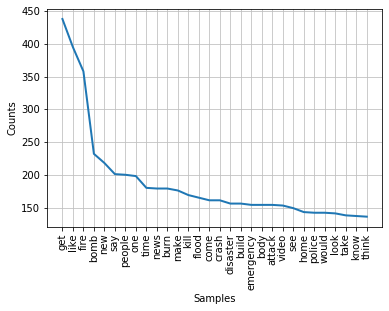

In [16]:
_ = fdist.plot(30, cumulative=False)
plt.show()

In [17]:
fdist.most_common(5)

[('get', 438), ('like', 395), ('fire', 358), ('bomb', 232), ('new', 218)]

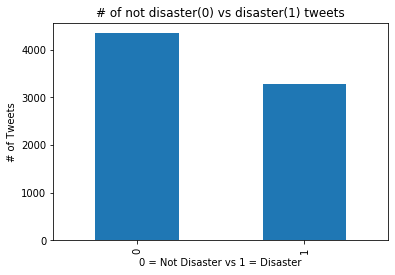

In [18]:
t = df.groupby('target')['target'].count()

_ = t.plot(x='id', y='target', kind='bar')
_ = plt.xlabel ('0 = Not Disaster vs 1 = Disaster')
_ = plt.ylabel ('# of Tweets')
_ = plt.title('# of not disaster(0) vs disaster(1) tweets')
plt.show()

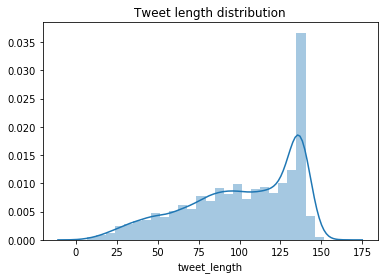

In [19]:
_ = sns.distplot(df['tweet_length']).set_title('Tweet length distribution')
plt.show()

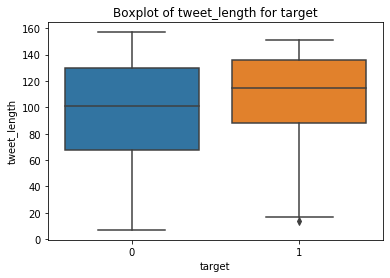

In [20]:
_ = sns.boxplot(data=df, x='target', y='tweet_length').set_title('Boxplot of tweet_length for target')
plt.show()